# IBM Advanced Data Science Capstone Project
### Topics: Predicting Hang Seng Index from a bunch of relevant indices
***By Matthew Yuen Nam Yeung***

![alt text](https://evergreensmallbusiness.com/wp-content/uploads/2017/11/iStock-544338034.jpg "stock price")

(photo source:https://evergreensmallbusiness.com/stock-market-monte-carlo-simulation-spreadsheet/)

---
## Introduction

Stock Market is so mysterious that no one can predict its exact movement. In classical literature stated by economist Burton Malkiel that all the stocks markets are perfectly efficient that all the current prices already reflected all factors. The stock prices move in random motions. However, some may argue that there are some people earn a lot of money in the stock markets. This trigger a lot of researchers spend a lot of time and resources to investigate the movement of the stock markets. 

In the old days, researchers may use regression and time series handling to predict the stock prices movement. The effectiveness of those methods are quite low. They are not reliable to use in the real time stock trading. Now, in this few years, machine learning algoirthms blossomed. A lot of different very effective and robust algorithms are born. Predicting the stock market prices seem to be a task that people would really interested in by applying the new algorithms.

   ### LSTM
Long Short Term Memory (LSTM) is a powerful maching learning algorithm that is used for training a time related data series. It consists of a mechanism that can remember the long term and short term data which might affect the subsquent series. This algorithm will be used in this research as the core tools for predicting the stock prices movement.


   ### Hang Seng Index
   
   I choose Hang Seng Index (HSI) as the stock benchmark that I would like to investigate. HSI is a Hong Kong Stock Market benchmark. Hong Kong stock market attract a lot of different companies all over the world, especially those from China and America. In fact the correlation between the China stock market and Hong Kong, and the US market are very high. This is a good sign for predicting the Hang Seng Index by these 2 markets.
   
   Financial market are always in link with a lot of different categories of other markets. For example, the stock market will fluctuate if the gold prices drop significantly. In order to factor in other categories movement in the model, a bunch of other indices famous in the market are used. The Indices are as follow:

1. Crude Oil Price                     (OIL)  
2. Gold Price                          (GOLD) 
3. Volatility Index of the stock market(VIX)  
4. China Stock Market                  (SHI)  
5. The Hong Kong Interest Rate         (HIBOR)
6. Dow Jones Index                      (DJI)  

In theory, all of the above indices and prices influence the movement of the Hang Seng index.

### Explanation

##### 1. Crude Oil Price
The Crude oil price is a kind of commodities that frequently trade everyday. In financial market, oil price is a benchmark of the economic wealthness. Oil is a special and crucial raw material for a lot of different industries. The prices of the movement of reveal the supply and demand of oil which in other hand shows the data of the economic growth. When the oil price rise, we predict the HSI also rise in the same side.

#### 2. Gold Price
Gold is another popular commodity for trading. In fact, many investors buy gold to hedge the currency drop especially for US currency. Thus, when the gold price rise, we can predict that investors are expect the currency is going to drop. Currency drops may imply the money from stock markets is drilling out. That means when the gold price increase, we predict the HSI decline.

#### 3.Volatility Index of the stock market
The stock market volatility measure the fluctuation of the market price. When the Volitility increase, we predict the stock market are not stable. A big rally or a drop are possible in the market. There is no direct relationship between the VIX and HSI.

#### 4.China Stock Market
Hong Kong is a part of China. In the financial market, Hong Kong is renowned for its sound stock market and attract a lot of overseas investors to pool money in this market. A large amount of China corporations choose Hong Kong as its base for launching the IPO (Initial Public Offerings). As those companies are Chinese corporation, the China market index will have a high correlation to the HSI.

#### 5.The Hong Kong Interest Rate
The interest rate of borrowing directly affect the borrowing cost of money. In theory, if the interest rate increase, the cost of borrowing money increase as well. Money flows to stock markets is also low. Thus, the stock prices may decrease in that case.

#### 6. Dow Jones Index
Dow Jones Index is the most important benchmark index of the US stock market. The US market influence almost all stock markets in the world at the same time. HSI investors may take the US news and data released into account when they make the investment decisions. 






---
## Description of the data
Theres are seven sets of data that should be collected which include:
1. Crude Oil Price                     (OIL)  
2. Gold Price                          (GOLD) 
3. Volatility Index of the stock market(VIX)  
4. China Stock Market                  (SHI)  
5. The Hong Kong Interest Rate         (HIBOR)
6. Dow Jones Index                     (DJI)
7. Hang Seng Index                     (HSI)

The daily closing price of all the indices and prices are collected in accoding to the date as index from 1/1/1999 to 1/1/2019. There are a lot of data providers in the website which provide free access to the data. The following 2 links are used:
-Federal Reserve Bank of St. Louise :https://fred.stlouisfed.org to obtain:
1. Crude Oil Price                     (OIL)  
2. Gold Price                          (GOLD) 
3. Volatility Index of the stock market(VIX) 

-Yahoo Financial : https://financial.yahoo.com to obtain:
4. China Stock Market                  (SHI)
5. The Hong Kong Interest Rate         (HIBOR)
6. Dow Jones Index                     (DJI)
7. Hang Seng Index                     (HSI)

In both sources, strutural data which written as CSV files are provided. In the Federal Reserve Bank data source, the csv files include 2 columns, say date and the price. In the Yahoo Financial data source, the file include 7 columns, only the date and 'Adj Close' columns are extracted.

The data downloaded are rather clean. However, there includes some missing values and null data which will be eliminated in the data process. 

---
## Methodology
Here is a brief description of the steps in the research:
1. Download and Extract useful data from the sources
2. Data cleansing and combining data
3. Visualize the indices and prices, basic statistics about the data
4. Apply Machine Learning algorithm I  (Deep Learning Algorithm)
5. Apply Machine Learning algorithm II (LSTM Algorithm)

#### 1. Download and Extract useful data from the sources
First, we import all the necessary libraries.

In [1]:
#import packages
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Import oil price

In [4]:
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_2de19e3e5fd745ea820d23d6cfc9a45f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jBXvEJJf8nEmgsF-X4l_cs7GCbDzsMr5oMa80mdO3_yD',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_2de19e3e5fd745ea820d23d6cfc9a45f.get_object(Bucket='apachesparktest-donotdelete-pr-uyswlsvd0toiln',Key='DCOILBRENTEU.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,DATE,DCOILBRENTEU
0,1999-01-04,10.94
1,1999-01-05,10.30
2,1999-01-06,10.67
3,1999-01-07,11.08
4,1999-01-08,11.70


Import Gold price

In [5]:
body = client_2de19e3e5fd745ea820d23d6cfc9a45f.get_object(Bucket='apachesparktest-donotdelete-pr-uyswlsvd0toiln',Key='GOLDAMGBD228NLBM.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

,DATE,GOLDAMGBD228NLBM
0,1999-01-04,288.250
1,1999-01-05,287.000
2,1999-01-06,287.150
3,1999-01-07,288.600
4,1999-01-08,290.900


Import VIX index

In [6]:
body = client_2de19e3e5fd745ea820d23d6cfc9a45f.get_object(Bucket='apachesparktest-donotdelete-pr-uyswlsvd0toiln',Key='VIXCLS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()

,DATE,VIXCLS
0,1999-01-04,26.17
1,1999-01-05,24.46
2,1999-01-06,23.34
3,1999-01-07,24.37
4,1999-01-08,23.28


Import China Market Index (Shanghai Stock Index)

In [7]:
body = client_2de19e3e5fd745ea820d23d6cfc9a45f.get_object(Bucket='apachesparktest-donotdelete-pr-uyswlsvd0toiln',Key='000001.SS (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,1144.887939,1144.889038,1124.213013,1125.818970,1125.818970,0.0
1,1999-01-05,1123.696045,1123.696045,1104.500977,1119.964966,1119.964966,0.0
2,1999-01-06,1120.667969,1137.208008,1120.401978,1132.589966,1132.589966,0.0
3,1999-01-07,1133.165039,1140.482056,1125.668945,1137.729004,1137.729004,0.0
4,1999-01-08,1138.767944,1168.838013,1138.767944,1168.813965,1168.813965,0.0


In [8]:
df_data_4 = df_data_4[['Date','Adj Close']] #extracting 2 columns
df_data_4.columns = ['DATE', 'SHindex']  # rename the 2 columns
df_data_4.head()

,DATE,SHindex
0,1999-01-04,1125.818970
1,1999-01-05,1119.964966
2,1999-01-06,1132.589966
3,1999-01-07,1137.729004
4,1999-01-08,1168.813965


Import Hang Seng Index

In [9]:
body = client_2de19e3e5fd745ea820d23d6cfc9a45f.get_object(Bucket='apachesparktest-donotdelete-pr-uyswlsvd0toiln',Key='^HSI.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,9982.259766,9982.259766,9764.980469,9809.169922,9809.169922,0.0
1,1999-01-05,9800.669922,9939.969727,9790.000000,9891.059570,9891.059570,0.0
2,1999-01-06,9967.429688,10233.799805,9967.429688,10233.799805,10233.799805,0.0
3,1999-01-07,10585.169922,10737.759766,10565.089844,10693.570313,10693.570313,0.0
4,1999-01-08,10713.150391,10898.250000,10687.790039,10722.700195,10722.700195,0.0


In [10]:
df_data_5 = df_data_5[['Date','Adj Close']] #extracting 2 columns
df_data_5.columns = ['DATE', 'HSI'] #rename the 2 columns
df_data_5.head()

,DATE,HSI
0,1999-01-04,9809.169922
1,1999-01-05,9891.059570
2,1999-01-06,10233.799805
3,1999-01-07,10693.570313
4,1999-01-08,10722.700195


Import Dow Jones Index

In [11]:
body = client_2de19e3e5fd745ea820d23d6cfc9a45f.get_object(Bucket='apachesparktest-donotdelete-pr-uyswlsvd0toiln',Key='^DJI.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_7 = pd.read_csv(body)
df_data_7.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


In [12]:
df_data_7 = df_data_7[['Date','Adj Close']] #extracting 2 columns
df_data_7.columns = ['DATE', 'DJI']  #rename the 2 columns
df_data_7.head()

,DATE,DJI
0,1985-01-29,1292.619995
1,1985-01-30,1287.880005
2,1985-01-31,1286.770020
3,1985-02-01,1277.719971
4,1985-02-04,1290.079956


Import the Hong Kong Interest Rate (HIBOR)

In [14]:
body = client_2de19e3e5fd745ea820d23d6cfc9a45f.get_object(Bucket='apachesparktest-donotdelete-pr-uyswlsvd0toiln',Key='hibor.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_6 = pd.read_csv(body)
df_data_6.head()

,Unnamed: 0,DATE,1-month,3-month,6-month,9-month,12-month
0,0,1999-01-04,5.16071,5.28125,5.70089,6.19196,6.61161
1,1,1999-01-05,5.07143,5.24554,5.64732,6.09375,6.51339
2,2,1999-01-06,4.91071,5.16518,5.54018,5.94196,6.33482
3,3,1999-01-07,5.01786,5.24554,5.59375,5.98661,6.37054
4,4,1999-01-08,4.87500,5.12500,5.54018,5.9375,6.31250


In [15]:
df_data_6 = df_data_6[['DATE','1-month']] #extracting 2 columns

#### 2. Data cleansing and combining data

Combining the 7 data sets into a Pandas Datafrmae.

In [19]:
df1 = df_data_1.merge(df_data_2, how='inner', on='DATE', left_index=True)
df2 = df1.merge(df_data_3, how='inner', on='DATE', left_index=True)
df3 = df2.merge(df_data_4, how='inner', on='DATE', left_index=True)
df4 = df3.merge(df_data_6, how='inner', on='DATE', left_index=True)
df5 = df4.merge(df_data_7, how='inner', on='DATE', left_index=True)
df6 = df5.merge(df_data_5, how='inner', on='DATE', left_index=True)
df6.head()

,DATE,DCOILBRENTEU,GOLDAMGBD228NLBM,VIXCLS,SHindex,1-month,DJI,HSI
0,1999-01-04,10.94,288.250,26.17,1125.818970,5.16071,9184.269531,9809.169922
1,1999-01-05,10.30,287.000,24.46,1119.964966,5.07143,9311.190430,9891.059570
2,1999-01-06,10.67,287.150,23.34,1132.589966,4.91071,9544.969727,10233.799805
3,1999-01-07,11.08,288.600,24.37,1137.729004,5.01786,9537.759766,10693.570313
4,1999-01-08,11.70,290.900,23.28,1168.813965,4.87500,9643.320313,10722.700195


In [20]:
#rename the columns
df6.columns = ['DATE', 'OIL', 'GOLD', 'VIX', 'SHI','HIBOR','DJI', 'HSI']

#shift the column of HSI by 1 up as the observable labels.
df6['HSI_y'] = df6['HSI'].shift(-1)

df6.head()

,DATE,OIL,GOLD,VIX,SHI,HIBOR,DJI,HSI,HSI_y
0,1999-01-04,10.94,288.250,26.17,1125.818970,5.16071,9184.269531,9809.169922,9891.059570
1,1999-01-05,10.30,287.000,24.46,1119.964966,5.07143,9311.190430,9891.059570,10233.799805
2,1999-01-06,10.67,287.150,23.34,1132.589966,4.91071,9544.969727,10233.799805,10693.570313
3,1999-01-07,11.08,288.600,24.37,1137.729004,5.01786,9537.759766,10693.570313,10722.700195
4,1999-01-08,11.70,290.900,23.28,1168.813965,4.87500,9643.320313,10722.700195,10634.269531


In [16]:
df6.tail()

,DATE,OIL,GOLD,VIX,SHI,HIBOR,DJI,HSI,HSI_y
5017,2018-12-20,52.84,1255.00,28.38,2536.268066,2.35589,22859.599609,25623.529297,25753.419922
5018,2018-12-21,51.93,1257.60,30.11,2516.250977,2.34714,22445.369141,25753.419922,25651.380859
5019,2018-12-24,.,1261.25,36.07,2527.007080,2.32107,21792.199219,25651.380859,25478.880859
5020,2018-12-27,51.49,1271.10,29.96,2483.085938,2.30795,23138.820313,25478.880859,25504.199219
5021,2018-12-28,50.57,1277.25,28.34,2493.895996,2.28679,23062.400391,25504.199219,NaN


From the tail of the data set, we can see that there are some data missing and some label as '.' 
We need to drop those columns.

In [21]:
df6 = df6[df6.OIL != '.']
df6 = df6[df6.GOLD != '.']
df6 = df6[df6.VIX != '.']
df6 = df6.dropna(axis=0)
df6.shape

(4618, 9)

In [22]:
#Chnage the data type of the 3 coloumns
df6['OIL'] = df6['OIL'].astype("float64")
df6['GOLD'] = df6['GOLD'].astype("float64")
df6['VIX'] = df6['VIX'].astype("float64")
df6.dtypes

DATE      object
OIL      float64
GOLD     float64
VIX      float64
SHI      float64
HIBOR    float64
DJI      float64
HSI      float64
HSI_y    float64
dtype: object

In [25]:
df6.OIL.isnull().values.sum() # find any '.' in the OIL column

0

In [20]:
df6.tail()

,DATE,OIL,GOLD,VIX,SHI,HIBOR,DJI,HSI,HSI_y
5015,2018-12-18,55.26,1248.8,25.58,2576.649902,2.38393,23675.640625,25814.250000,25865.390625
5016,2018-12-19,55.60,1248.6,25.58,2549.562988,2.39821,23323.660156,25865.390625,25623.529297
5017,2018-12-20,52.84,1255.0,28.38,2536.268066,2.35589,22859.599609,25623.529297,25753.419922
5018,2018-12-21,51.93,1257.6,30.11,2516.250977,2.34714,22445.369141,25753.419922,25651.380859
5020,2018-12-27,51.49,1271.1,29.96,2483.085938,2.30795,23138.820313,25478.880859,25504.199219


Now, it is clear that all the data in the dataframe are will data and are all clean.

#### 3.Visualize the indices and prices, basic statistics about the data

In [21]:
#Statistics about the dataset
df6.describe()

,OIL,GOLD,VIX,SHI,HIBOR,DJI,HSI,HSI_y
count,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000
mean,61.784179,871.264844,19.963062,2369.408752,1.783812,13202.272430,18840.363764,18843.708028
std,31.658342,472.537054,8.531792,910.556256,1.986402,4397.878850,5641.592719,5640.862379
min,9.770000,252.900000,9.140000,1011.499023,0.040180,6547.049805,8409.009766,8409.009766
25%,31.662500,385.437500,13.720000,1617.146790,0.225000,10335.285400,13762.500000,13764.537842
50%,57.370000,912.250000,18.135000,2197.854493,0.720890,11286.629883,19836.609376,19836.609376
75%,82.852500,1265.475000,23.820000,2993.964538,3.532210,15911.170166,23010.890625,23009.603027
max,143.950000,1891.000000,80.860000,6092.057129,7.055800,26743.500000,33154.121094,33154.121094


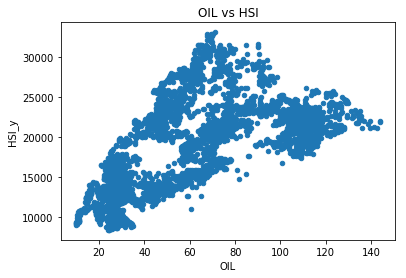

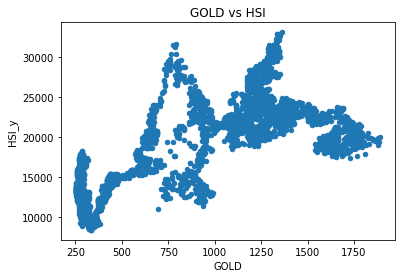

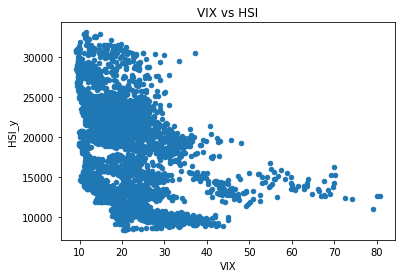

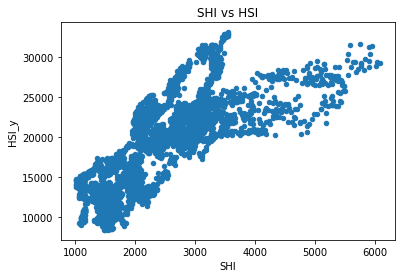

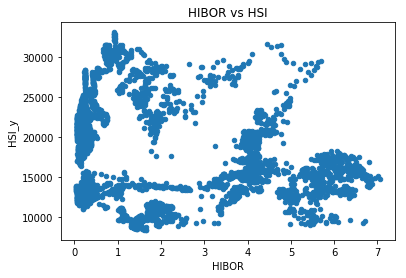

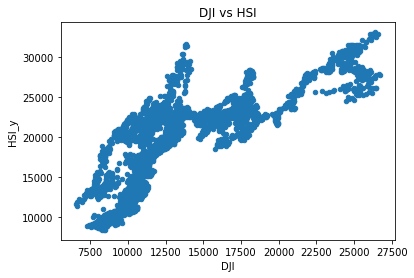

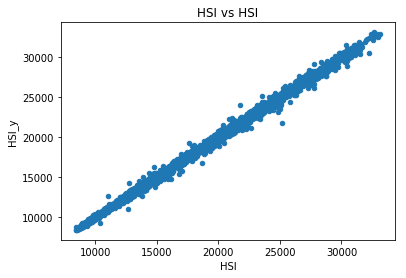

In [23]:
# Plots showing the relationship and trends between the indices
df6.plot(x='OIL', y='HSI_y', kind='scatter',title = 'OIL vs HSI')
df6.plot(x='GOLD', y='HSI_y', kind='scatter' ,title = 'GOLD vs HSI')
df6.plot(x='VIX', y='HSI_y', kind='scatter',title = 'VIX vs HSI')
df6.plot(x='SHI', y='HSI_y', kind='scatter',title = 'SHI vs HSI')
df6.plot(x='HIBOR', y='HSI_y', kind='scatter',title = 'HIBOR vs HSI')
df6.plot(x='DJI', y='HSI_y', kind='scatter',title = 'DJI vs HSI')
df6.plot(x='HSI', y='HSI_y', kind='scatter',title = 'HSI vs HSI')



From the graph above, some of them show clear correlation. However, we are not sure how much they correlate. By ploting the correlation Heat Map, we can easily visualize there relationships.

In [37]:
#correlation of the groups
df6.corr()

,OIL,GOLD,VIX,SHI,HIBOR,DJI,HSI,HSI_y
OIL,1.000000,0.779170,-0.197921,0.370575,-0.428808,0.252090,0.627841,0.626871
GOLD,0.779170,1.000000,-0.197758,0.508221,-0.668930,0.565902,0.765001,0.764833
VIX,-0.197921,-0.197758,1.000000,-0.099298,0.111599,-0.480241,-0.389586,-0.392528
SHI,0.370575,0.508221,-0.099298,1.000000,-0.235269,0.503685,0.773979,0.773217
HIBOR,-0.428808,-0.668930,0.111599,-0.235269,1.000000,-0.293723,-0.345249,-0.344974
DJI,0.252090,0.565902,-0.480241,0.503685,-0.293723,1.000000,0.798579,0.798702
HSI,0.627841,0.765001,-0.389586,0.773979,-0.345249,0.798579,1.000000,0.998714
HSI_y,0.626871,0.764833,-0.392528,0.773217,-0.344974,0.798702,0.998714,1.000000


<function matplotlib.pyplot.show>

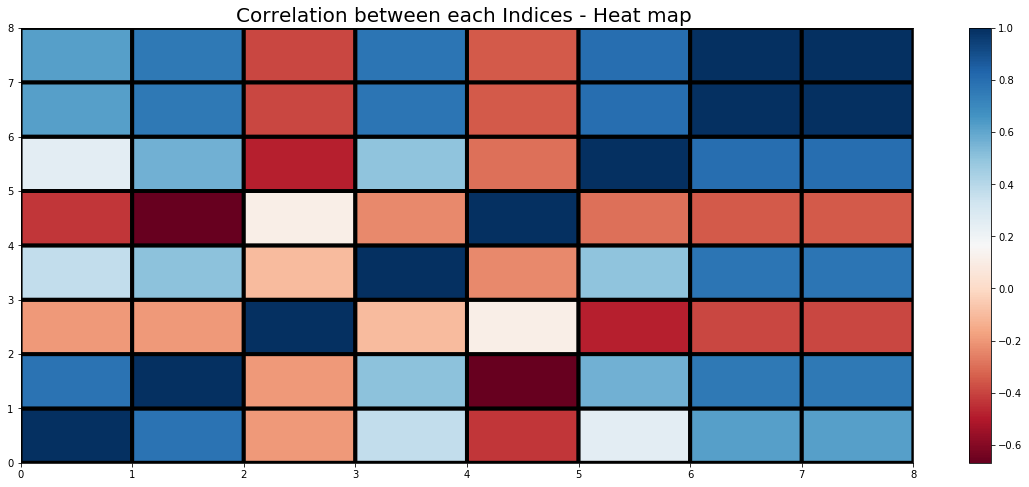

In [36]:
# Correlation Heat map
plt.figure(figsize = (20,8))
plt.pcolor(df6.corr(), cmap='RdBu',edgecolors='k', linewidths=4)
plt.title('Correlation between each Indices - Heat map ', fontsize=20)
plt.colorbar()
plt.show

Another way to measure the performance of a stock is to measure the percentage change of it from the previous day.

In [38]:
# Percentage change
df7 = df6[['OIL', 'GOLD', 'VIX', 'SHI','HIBOR','DJI','HSI', 'HSI_y']]
df7 = df7.pct_change(fill_method='ffill').dropna(axis=0)
df7.head()

,OIL,GOLD,VIX,SHI,HIBOR,DJI,HSI,HSI_y
1,-0.058501,-0.004337,-0.065342,-0.005200,-0.017300,0.013819,0.008348,0.034652
2,0.035922,0.000523,-0.045789,0.011273,-0.031691,0.025107,0.034652,0.044927
3,0.038425,0.005050,0.044130,0.004537,0.021820,-0.000755,0.044927,0.002724
4,0.055957,0.007970,-0.044727,0.027322,-0.028470,0.011068,0.002724,-0.008247
5,0.031624,0.001203,0.093643,0.003421,0.068681,-0.002430,-0.008247,0.007268


In [39]:
# Statistics of the percentage change of each indices
df7.describe()

,OIL,GOLD,VIX,SHI,HIBOR,DJI,HSI,HSI_y
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,0.000613,0.000388,0.002607,0.000305,0.001954,0.000269,0.000325,0.000324
std,0.023565,0.011574,0.074270,0.016352,0.069355,0.011739,0.015358,0.015412
min,-0.180373,-0.085271,-0.295726,-0.119827,-0.509207,-0.106580,-0.136666,-0.136666
25%,-0.011633,-0.005411,-0.038226,-0.006906,-0.010143,-0.004763,-0.006847,-0.006853
50%,0.000640,0.000235,-0.004791,0.000315,0.000000,0.000467,0.000517,0.000517
75%,0.013125,0.006068,0.034254,0.007756,0.009794,0.005732,0.007832,0.007832
max,0.279732,0.100607,1.155979,0.098570,1.162140,0.110803,0.143471,0.143471


Just like the indices movement, we look at the correlation between the percentage changes.

In [27]:
#Correlation 
df7.corr()

,OIL,GOLD,VIX,SHI,HIBOR,DJI,HSI,HSI_y
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,0.000613,0.000388,0.002607,0.000305,0.001954,0.000269,0.000325,0.000324
std,0.023565,0.011574,0.074270,0.016352,0.069355,0.011739,0.015358,0.015412
min,-0.180373,-0.085271,-0.295726,-0.119827,-0.509207,-0.106580,-0.136666,-0.136666
25%,-0.011633,-0.005411,-0.038226,-0.006906,-0.010143,-0.004763,-0.006847,-0.006853
50%,0.000640,0.000235,-0.004791,0.000315,0.000000,0.000467,0.000517,0.000517
75%,0.013125,0.006068,0.034254,0.007756,0.009794,0.005732,0.007832,0.007832
max,0.279732,0.100607,1.155979,0.098570,1.162140,0.110803,0.143471,0.143471


<function matplotlib.pyplot.show>

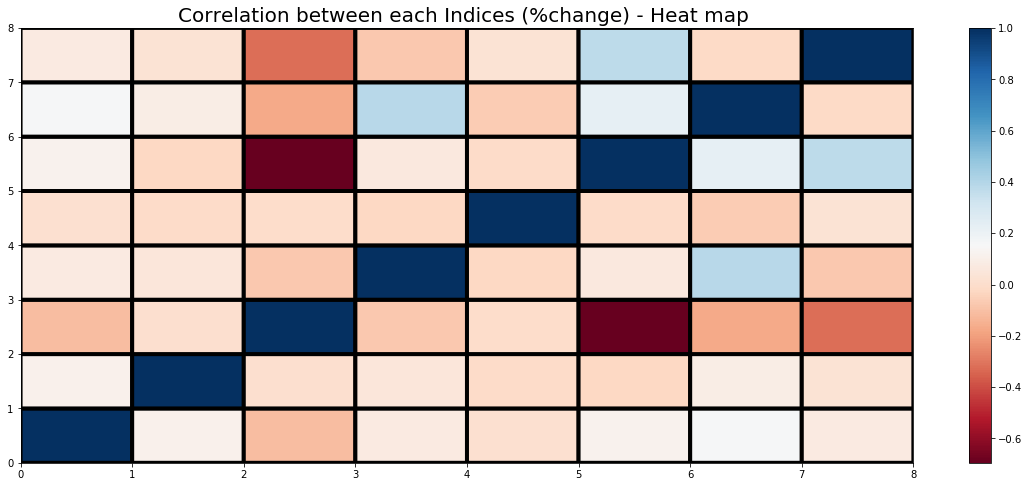

In [40]:
# Correlation Heat map
plt.figure(figsize = (20,8))
plt.pcolor(df7.corr(), cmap='RdBu',edgecolors='k', linewidths=4)
plt.title('Correlation between each Indices (%change) - Heat map ', fontsize=20)
plt.colorbar()
plt.show

We can see that most of the indices show very low correlation between each other. Thus, we are not choosing the percentage change of the indices to be investigated.

#### 4.Apply Machine Learning algorithm I (Deep Learning Algorithm)
The first algorithm used is the pure Neural Network without LSTM. 

In [41]:
# Import all the libraries in for the Neural Network training and evaluation
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [42]:
# split into input (X) and output (Y) variables
from sklearn.model_selection import train_test_split
dataset = df6[['OIL', 'GOLD', 'VIX','SHI','HIBOR', 'DJI', 'HSI','HSI_y']].values
X = dataset[:,0:7]
Y = dataset[:,7]

# split the training and test set of data. 10% of the total dataset is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.10, shuffle=False)

In [43]:
# Feature Scaling and reshaping
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_train = sc.fit_transform(y_train.reshape(-1, 1))
y_test = sc.fit_transform(y_test.reshape(-1, 1))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4156, 7) (462, 7) (4156, 1) (462, 1)


In [44]:
# create model, 1 input layer ,5 hidden layers and 1 output layers are created
model = Sequential()
model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dense(15,  kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(6,  kernel_initializer='normal', activation='relu'))
model.add(Dense(3,  kernel_initializer='normal', activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model, loss function used mean squared error
model.compile(loss='mean_squared_error', optimizer='adam')


In [45]:
# Set some hyperparameter for training, fix random seed for reproducibility, 
seed = 9
epochs = 200
batch_size = 100
np.random.seed(seed)


In [46]:
#Fit the training data set to the model defined above and train
for i in range(epochs):
    print("Epoch: " + str(i))
    model.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    model.reset_states()

Epoch: 0
Epoch 1/1
4156/4156 [==============================] - 0s 108us/step - loss: 0.1900
Epoch: 1
Epoch 1/1
4156/4156 [==============================] - 0s 29us/step - loss: 0.1387
Epoch: 2
Epoch 1/1
4156/4156 [==============================] - 0s 24us/step - loss: 0.0465
Epoch: 3
Epoch 1/1
4156/4156 [==============================] - 0s 24us/step - loss: 0.0542
Epoch: 4
Epoch 1/1
4156/4156 [==============================] - 0s 22us/step - loss: 0.0408
Epoch: 5
Epoch 1/1
4156/4156 [==============================] - 0s 25us/step - loss: 0.0373
Epoch: 6
Epoch 1/1
4156/4156 [==============================] - 0s 33us/step - loss: 0.0323
Epoch: 7
Epoch 1/1
4156/4156 [==============================] - 0s 26us/step - loss: 0.0275
Epoch: 8
Epoch 1/1
4156/4156 [==============================] - 0s 26us/step - loss: 0.0225
Epoch: 9
Epoch 1/1
4156/4156 [==============================] - 0s 25us/step - loss: 0.0179
Epoch: 10
Epoch 1/1
4156/4156 [==============================] - 0s 26us/step -

4156/4156 [==============================] - 0s 36us/step - loss: 0.0063
Epoch: 89
Epoch 1/1
4156/4156 [==============================] - 0s 26us/step - loss: 0.0079
Epoch: 90
Epoch 1/1
4156/4156 [==============================] - 0s 27us/step - loss: 0.0090
Epoch: 91
Epoch 1/1
4156/4156 [==============================] - 0s 25us/step - loss: 0.0089
Epoch: 92
Epoch 1/1
4156/4156 [==============================] - 0s 26us/step - loss: 0.0072
Epoch: 93
Epoch 1/1
4156/4156 [==============================] - 0s 26us/step - loss: 0.0048
Epoch: 94
Epoch 1/1
4156/4156 [==============================] - 0s 26us/step - loss: 0.0029
Epoch: 95
Epoch 1/1
4156/4156 [==============================] - 0s 35us/step - loss: 0.0018
Epoch: 96
Epoch 1/1
4156/4156 [==============================] - 0s 26us/step - loss: 0.0016
Epoch: 97
Epoch 1/1
4156/4156 [==============================] - 0s 26us/step - loss: 0.0019
Epoch: 98
Epoch 1/1
4156/4156 [==============================] - 0s 25us/step - loss: 0.00

From the trainging result, the loss is 0.0019 which is an acceptable result. 

In [47]:
#use the trained model to predict the test data set
predicted_values = model.predict(X_test, batch_size=batch_size)

In [48]:
#reshape the predicted data set
predicted_values = np.reshape(predicted_values, 
                                       (predicted_values.shape[0], 
                                        predicted_values.shape[1]))

#inverse tranform the test data to original scale
predicted_values = sc.inverse_transform(predicted_values)
X_train = sc.inverse_transform(X_train)
X_test = sc.inverse_transform(X_test)
y_train = sc.inverse_transform(y_train.reshape(-1, 1))
y_test = sc.inverse_transform(y_test.reshape(-1, 1))


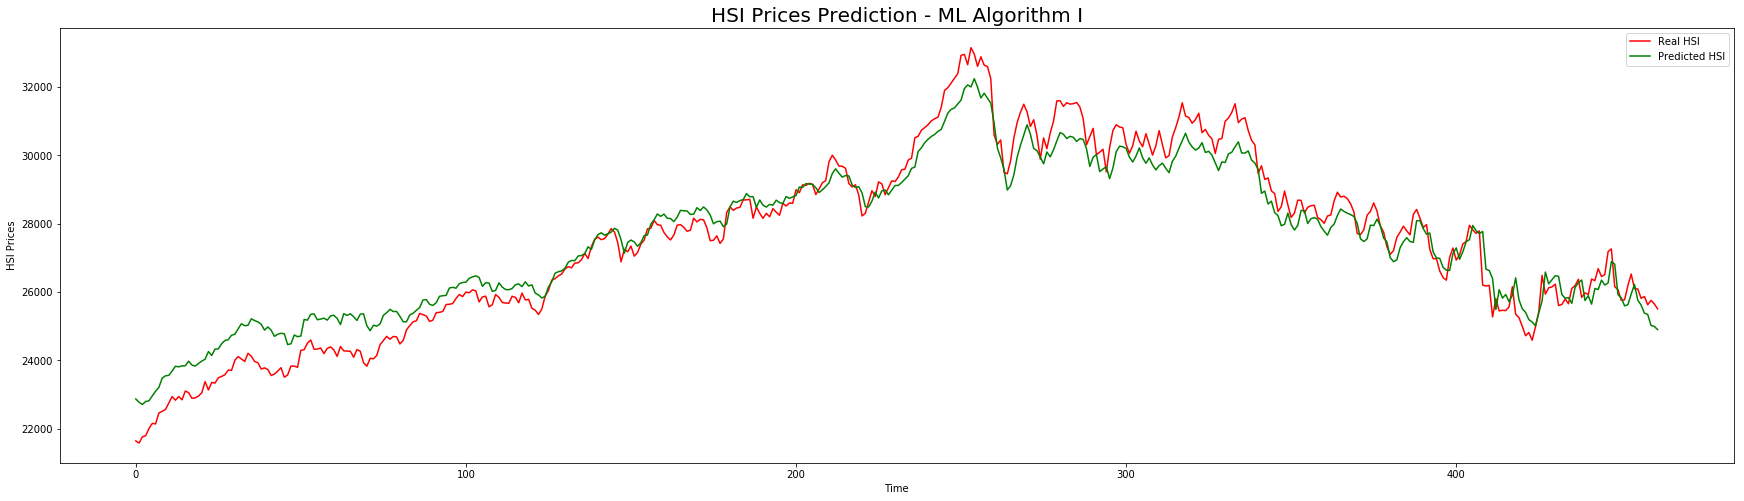

In [50]:
# Visualising the results
plt.figure(figsize=(30,8))
plt.plot(y_test, color = 'red', label = 'Real HSI')
plt.plot(predicted_values, color = 'green', label = 'Predicted HSI')
plt.title('HSI Prices Prediction - ML Algorithm I', fontsize=20)
plt.xlabel('Time')
plt.ylabel('HSI Prices')
plt.legend()
plt.show()

We can see that in the graph, the predicted prices are quite close to the true prices.

Lets look at the different between the predicted value and strue value, say 'Predicted Price minus Real Price'.

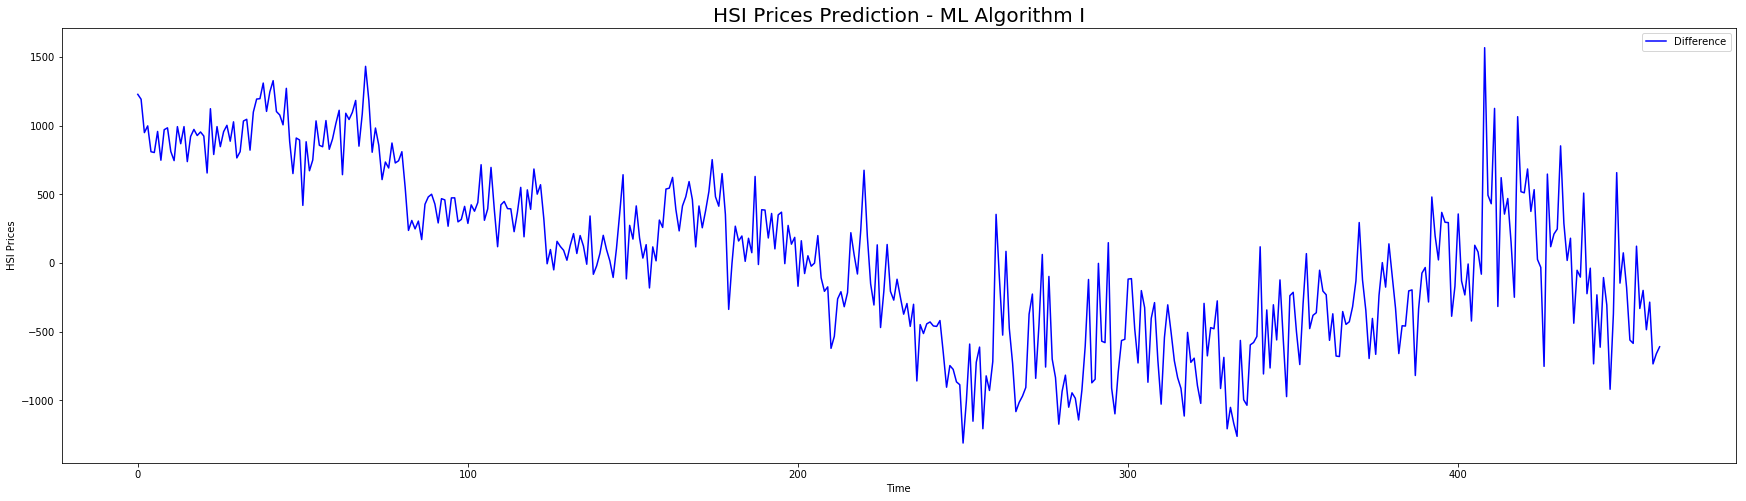

In [54]:
#plot the Predicted Price minus Real Price
plt.figure(figsize=(30,8))
plt.plot((predicted_values-y_test), color = 'blue', label = 'Difference')
plt.title('Difference between Real HSI Prices and Prediction - ML Algorithm I' , fontsize=20)
plt.xlabel('Time')
plt.ylabel('HSI Prices')
plt.legend()
plt.show()

In the above graph, we are not quite sure about the distribution of the difference. We apply some fair measurements to the difference, say Mean, Standard Deviation and Skewness.

In [55]:
from scipy.stats import skew
print('Mean:',np.mean(predicted_values-y_test))
print('Standard Deviation:',np.std(predicted_values-y_test))
print('Skewness: ',skew(predicted_values-y_test))

Mean: 48.3920580898
Standard Deviation: 618.026060931
Skewness:  [ 0.03424341]


The mean is quite acceptable for prediction as it is less than 50. However, the SD is very high, means the different spread to a very wide range. Lets take a look at the histogram of the difference.

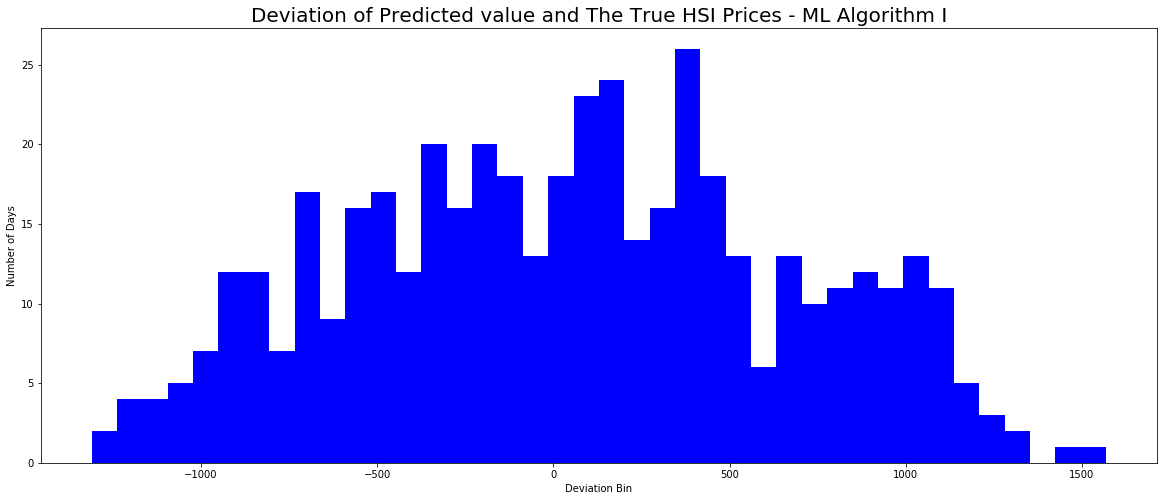

In [58]:
#Histogram of the Difference
plt.figure(figsize=(20,8))
plt.hist((predicted_values-y_test), color = 'blue', bins=40)
plt.title('Deviation of Predicted value and The True HSI Prices - ML Algorithm I' , fontsize =20)
plt.xlabel('Deviation Bin')
plt.ylabel('Number of Days')
plt.legend()
plt.show()

We may curious that if the algorithm help us to earn money if we follow the predicted price to buy or sell the HSI index. Now we assume that HSI index is a stock and we can buy and sell freely in the stock market. So we follow a buy and sell strategy that if the model predicted the price tmr is higher than today, we buy the HSI, and if it predicts lower than today, we sell the HSI. 

In [59]:
#Algorithm for the gain and loss
gain_loss = []
for i in range(1,len(predicted_values)):
    if predicted_values[i] > y_test[i-1]:
        z = gain_loss.append(1)
    else: z = gain_loss.append(0)

buy_sell = [1]
for i in range(1, len(gain_loss)):
    if gain_loss[i] == gain_loss[i-1]:
        buy_sell.append(2)
    else: buy_sell.append(gain_loss[i])

In [60]:
strategy = pd.DataFrame({'buy_sell' : buy_sell , 'HSI' : X_test[:len(buy_sell),6]})

In [61]:
print('Gain or Loss by the strategy:' , strategy[strategy.buy_sell == 0].HSI.sum() - strategy[strategy.buy_sell == 1].HSI.sum())


Gain or Loss by the strategy: 5141.089844


So finally, we find that even if the predicted value is not quite close to the real prices, we still can earn money by the algorithm itself.

#### 5.Apply Machine Learning algorithm II (LSTM Algorithm)

Now, we will do the same analysis to that of LSTM algorithm. Let us see what will be different.

In [64]:
# define new hyperparameter for LSTM algorithm
batch_size = 64
epochs = 30
timesteps = 15

In [65]:
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print (x)
    return (max(train_length_values))

In [66]:
length = len(X)

In [67]:
length = get_train_length(X, batch_size, 0.1)
print (length)

4096
4096


In [68]:
#Adding timesteps * 2
upper_train = length + timesteps*2
df_data_1_train = X[0:upper_train]
df_data_1_train.shape

(4126, 7)

In [69]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(df_data_1_train))
training_set_scaled1 = sc.fit_transform(np.float64(df_data_1_train[:,6].reshape(-1, 1)))
training_set_scaled.shape

(4126, 7)

In [70]:
X_train = []
y_train = []

# Creating a data structure with n timesteps

print (length + timesteps)
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,:])
    y_train.append(training_set_scaled1[i:i+timesteps,0])

print (len(X_train))
print (len (y_train))
print (np.array(X_train).shape)
print (np.array(y_train).shape)

4111
4096
4096
(4096, 15, 7)
(4096, 15)


In [71]:
# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print (X_train.shape)
print (y_train.shape)

(4096, 15, 7)
(4096, 15, 1)


In [72]:
# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py

In [73]:
# Initialising the LSTM Model with MSE Loss-Function
# Using Functional API

inputs_1_mae = Input(batch_shape=(batch_size,timesteps,7))
lstm_1_mae = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mae)
lstm_2_mae = LSTM(6, stateful=True, return_sequences=True)(lstm_1_mae)
lstm_3_mae = LSTM(3, stateful=True, return_sequences=True)(lstm_2_mae)

output_1_mae = Dense(units = 1)(lstm_3_mae)

regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

regressor_mae.compile(optimizer='adam', loss = 'mse')
regressor_mae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (64, 15, 7)               0         
_________________________________________________________________
lstm_1 (LSTM)                (64, 15, 10)              720       
_________________________________________________________________
lstm_2 (LSTM)                (64, 15, 6)               408       
_________________________________________________________________
lstm_3 (LSTM)                (64, 15, 3)               120       
_________________________________________________________________
dense_8 (Dense)              (64, 15, 1)               4         
Total params: 1,252
Trainable params: 1,252
Non-trainable params: 0
_________________________________________________________________


In [74]:
from keras import backend as K

K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

In [75]:
for i in range(epochs):
    print("Epoch: " + str(i))
    regressor_mae.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    regressor_mae.reset_states()

Epoch: 0
Epoch 1/1
4096/4096 [==============================] - 5s 1ms/step - loss: 0.0155
Epoch: 1
Epoch 1/1
4096/4096 [==============================] - 4s 995us/step - loss: 0.0265
Epoch: 2
Epoch 1/1
4096/4096 [==============================] - 4s 1ms/step - loss: 0.0156
Epoch: 3
Epoch 1/1
4096/4096 [==============================] - 4s 1ms/step - loss: 0.0107A: 0s - loss: 0
Epoch: 4
Epoch 1/1
4096/4096 [==============================] - 4s 1ms/step - loss: 0.0110
Epoch: 5
Epoch 1/1
4096/4096 [==============================] - 4s 999us/step - loss: 0.0081
Epoch: 6
Epoch 1/1
4096/4096 [==============================] - 4s 984us/step - loss: 0.0077
Epoch: 7
Epoch 1/1
4096/4096 [==============================] - 4s 995us/step - loss: 0.0070
Epoch: 8
Epoch 1/1
4096/4096 [==============================] - 4s 1ms/step - loss: 0.0064
Epoch: 9
Epoch 1/1
4096/4096 [==============================] - 4s 1ms/step - loss: 0.0059
Epoch: 10
Epoch 1/1
4096/4096 [==============================] - 4s

In [76]:
def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print (x)
    return (max(test_length_values))

In [77]:
test_length = get_test_length(X, batch_size)
print(test_length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
print (testset_length)

4446
4510
4574
4574
448


In [78]:
print (upper_train, upper_test, len(X))

4126 4604 4618


In [79]:
# construct test set

#subsetting
test_set = X[upper_train:upper_test] 

#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))
#scaled_real_bcg_values_test1 = sc.fit_transform(np.float64(test_set[:,6].reshape(1, -1)))

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, :])
X_test = np.array(X_test)


#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [80]:
#prediction
predicted_bcg_values_test_mae = regressor_mae.predict(X_test, batch_size=batch_size)

print (predicted_bcg_values_test_mae.shape)



#reshaping
predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                       (predicted_bcg_values_test_mae.shape[0], 
                                        predicted_bcg_values_test_mae.shape[1]))

print (predicted_bcg_values_test_mae.shape)

#creating y_test data
y_test = []
for j in range(0, testset_length - timesteps):
    y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])

# reshaping
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print (y_test.shape)

concat = np.concatenate((scaled_real_bcg_values_test[0:len(y_test),0:6],y_test), axis=1)

#inverse transform
y_test = sc.inverse_transform(concat)[:,6]



(448, 15, 1)
(448, 15)
(433, 1)


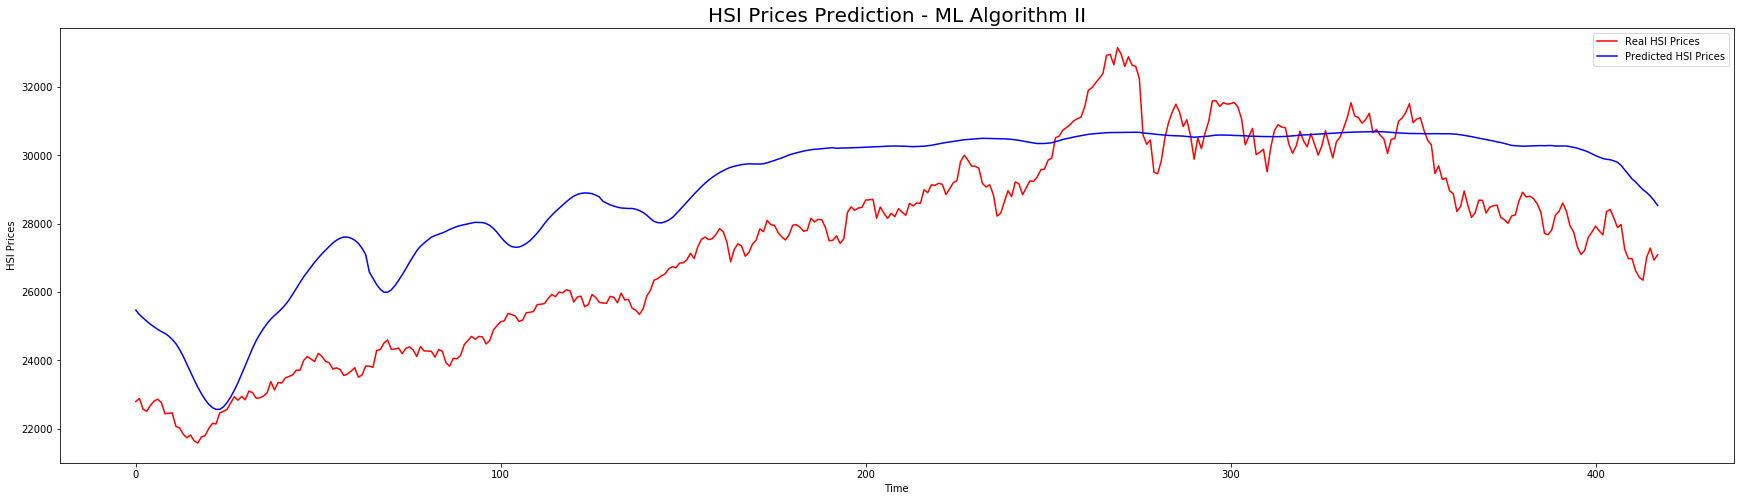

In [81]:
# Visualising the results
plt.figure(figsize=(30,8))
plt.plot(test_set[timesteps:len(y_test),6], color = 'red', label = 'Real HSI Prices')
plt.plot(y_test[0:len(y_test) - timesteps], color = 'blue', label = 'Predicted HSI Prices')
plt.title('HSI Prices Prediction - ML Algorithm II', fontsize=20)
plt.xlabel('Time')
plt.ylabel('HSI Prices')
plt.legend()
plt.show()

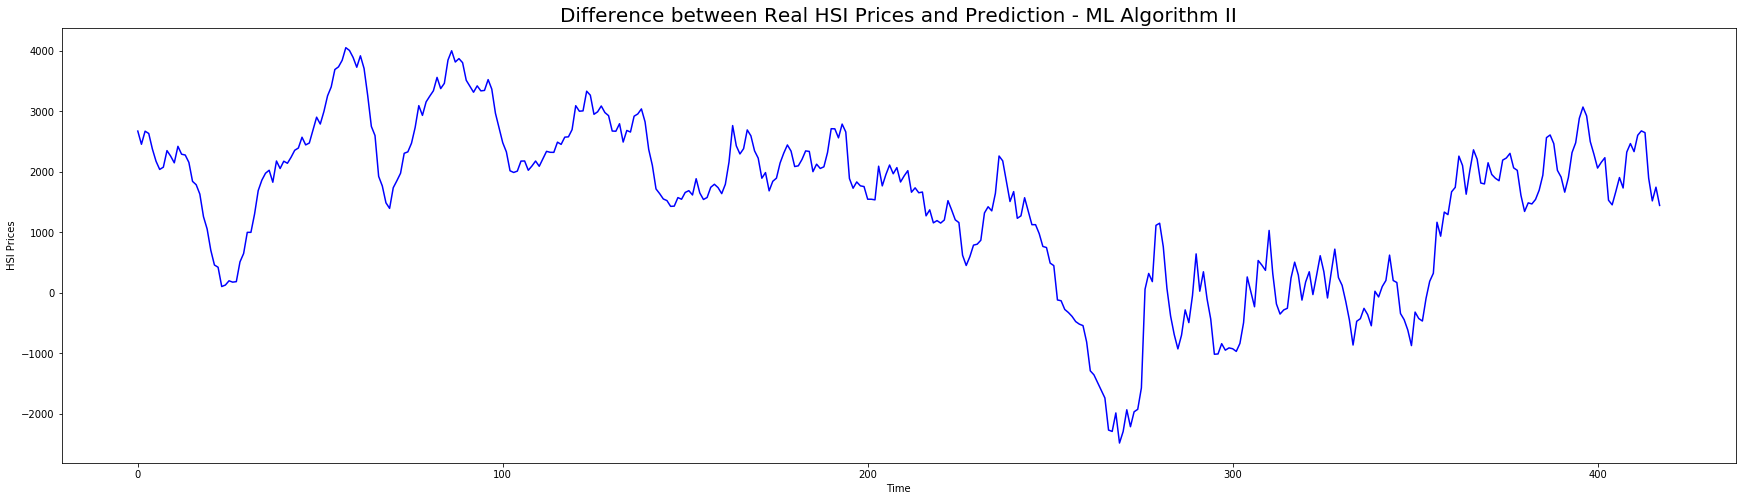

In [82]:
# Plot Predicted Price minus Real Price
plt.figure(figsize=(30,8))
plt.plot((y_test[0:len(y_test) - timesteps]-test_set[timesteps:len(y_test),6]), color = 'blue', label = '')
plt.title('Difference between Real HSI Prices and Prediction - ML Algorithm II' , fontsize=20)
plt.xlabel('Time')
plt.ylabel('HSI Prices')
plt.legend()
plt.show()

In [83]:
from scipy.stats import skew
print('Mean:',np.mean(y_test[0:len(y_test) - timesteps]-test_set[timesteps:len(y_test),6]))
print('Standard Deviation:',np.std(y_test[0:len(y_test) - timesteps]-test_set[timesteps:len(y_test),6]))
print('Skewness:', skew(y_test[0:len(y_test) - timesteps]-test_set[timesteps:len(y_test),6]))

Mean: 1501.03325899
Standard Deviation: 1334.22942266
Skewness: -0.6510385739416297


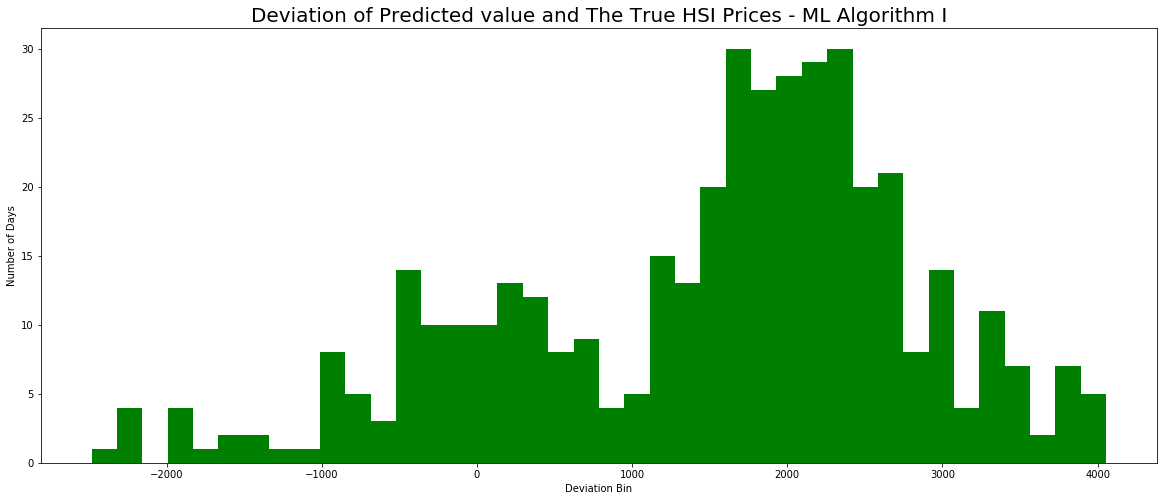

In [84]:
#Histogram of the Deviation of predicted Price and Real Price
plt.figure(figsize=(20,8))
plt.hist((y_test[0:len(y_test) - timesteps]-test_set[timesteps:len(y_test),6]), color = 'green', bins=40)
plt.title('Deviation of Predicted value and The True HSI Prices - ML Algorithm I' , fontsize =20)
plt.xlabel('Deviation Bin')
plt.ylabel('Number of Days')
plt.legend()
plt.show()

We use the same buy and sell strategy as before.

In [86]:
#Gain and loss Function
gain_loss = []
for i in range(0,len(y_test[0:len(y_test) - timesteps])+1):
    if y_test[i] > test_set[timesteps + i,6]:
        z = gain_loss.append(1)
    else: z = gain_loss.append(0)

buy_sell = [1]
for i in range(1, len(gain_loss)-1):
    if gain_loss[i] == gain_loss[i-1]:
        buy_sell.append(2)
    else: buy_sell.append(gain_loss[i])
        
strategy_LSTM = pd.DataFrame({'buy_sell' : buy_sell , 'HSI' : test_set[timesteps:len(y_test),6]})
length_strategy = len(strategy_LSTM)

In [87]:
print('Gain or Loss by the strategy:' , strategy_LSTM[strategy_LSTM.buy_sell == 0].HSI.sum() - strategy_LSTM[strategy_LSTM.buy_sell == 1].HSI.sum() + strategy_LSTM.iloc[length_strategy-1,0])

Gain or Loss by the strategy: 8703.224606


Although LSTM algorithm can earn more profit then the algorithm 1, it shows a higher uncertainty that when we use the algorithm.